In [1]:
from tensorflow.python.keras import applications
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential, Model 
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.python.keras import backend as k 
from tensorflow.python.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 64, 64
train_data_dir = "data/train"
validation_data_dir = "data/val"
nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 32
epochs = 50

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))


/home/vimal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from skimage import color, io , transform
from scipy.misc import imresize
import numpy as np
from sklearn.cross_validation import train_test_split
import os
from glob import glob
from skimage.transform import resize , rescale
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA

files_path = 'train/'
pca = PCA(n_components=1600)
cat_files_path = os.path.join(files_path, 'cat*.jpg')
dog_files_path = os.path.join(files_path, 'dog*.jpg')
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

n_files = len(cat_files) + len(dog_files)
#n_files = 500


size_image =64
#size_image2 = 64

allX = np.load('cls_x.npy')
ally = np.load('cls_y.npy')

X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.30, random_state=42)
# test-train split   

print(X.shape)
print(os.getcwd())
#Adding custom Layers 


/home/vimal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(34998, 64, 64, 3)
/home/vimal


In [3]:

import warnings
warnings.filterwarnings('ignore')
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)
for layer in model.layers:
    layer.trainable = False
# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])



# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=0, mode='auto')
from tensorflow.python.keras.utils import to_categorical
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)



Epoch 1/1
34998/34998 [==============================] - 368s 11ms/step - loss: 0.4129 - acc: 0.7868


--- Logging error ---
Traceback (most recent call last):
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/vimal/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/vimal/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/vimal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/vimal/anaconda3/lib/python3.

[[0.26868188 0.7313181 ]]
0.26868188 0.731318
Dog


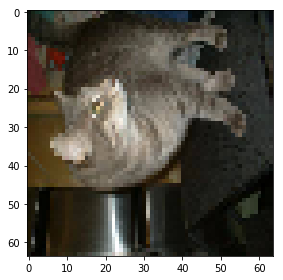

In [4]:
model_final.fit(x=X,
          y=Y,
          epochs=1, batch_size=32,callbacks = [checkpoint, early])


import warnings
warnings.filterwarnings('ignore')
img = io.imread('test/8289.jpg')
rot = transform.rotate(img,50)
#new_img = color.rgb2gray(img)
new_img = np.array(resize(img,(size_image,size_image,3)))
l = np.zeros((1,size_image,size_image,3),dtype='float')
l[0] = new_img
io.imshow(l[0])
ans = str(model_final.predict(l)[0]).split()
if 'e' in ans[0][1:]:
    a =ans[0][2:].split('e')
    a1 = float(a[0])*10**int(a[1])
else:
    a1=float(ans[0][2:])
if 'e' in ans[1][:-1]:
    b = ans[1][:-1].split('e')
    b1 = float(b[0])*10**int(b[1])
else:
    b1=float(ans[1][:-1])
print(model_final.predict(x=l))
print(a1,b1)
if a1>b1:
    print('Cat')
else:
    print('Dog')

In [5]:
result = model_final.evaluate(x=X_test,
                        y=Y_test)

15000/15000 [==============================] - 134s 9ms/step


In [6]:
for name, value in zip(model_final.metrics_names, result):
    print(name, value)

loss 0.3492666348775228
acc 0.8122666666666667


In [7]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [13]:
for layers in model_final.layers:
    print(layers.trainable,layers.name)
 

False input_1
False block1_conv1
False block1_conv2
False block1_pool
False block2_conv1
False block2_conv2
False block2_pool
False block3_conv1
False block3_conv2
False block3_conv3
False block3_conv4
False block3_pool
True block4_conv1
True block4_conv2
True block4_conv3
True block4_conv4
True block4_pool
True block5_conv1
True block5_conv2
True block5_conv3
True block5_conv4
True block5_pool
True flatten
True dense
True dropout
True dense_1
True dense_2


In [17]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.00001, momentum=0.9), metrics=["accuracy"])

Epoch 1/1
34998/34998 [==============================] - 708s 20ms/step - loss: 0.2814 - acc: 0.8642
[[0.29773408 0.7022659 ]]
0.29773408 0.702265
Dog


--- Logging error ---
Traceback (most recent call last):
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/home/vimal/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/vimal/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/vimal/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/vimal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/vimal/anaconda3/lib/python3.

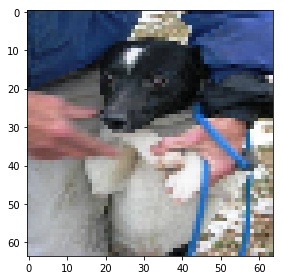

In [19]:
model_final.fit(x=X,
          y=Y,
          epochs=1, batch_size=32,callbacks = [checkpoint, early])




[[0.24661086 0.7533891 ]]
0.24661086 0.753389
Dog


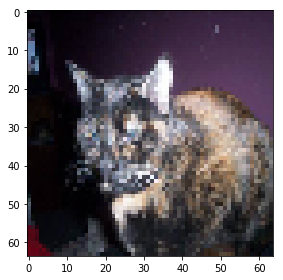

In [34]:
import warnings
warnings.filterwarnings('ignore')
img = io.imread('test/13.jpg')
rot = transform.rotate(img,50)
#new_img = color.rgb2gray(img)
new_img = np.array(resize(img,(size_image,size_image,3)))
l = np.zeros((1,size_image,size_image,3),dtype='float')
l[0] = new_img
io.imshow(l[0])
ans = str(model_final.predict(l)[0]).split()
if 'e' in ans[0][1:]:
    a =ans[0][2:].split('e')
    a1 = float(a[0])*10**int(a[1])
else:
    a1=float(ans[0][2:])
if 'e' in ans[1][:-1]:
    b = ans[1][:-1].split('e')
    b1 = float(b[0])*10**int(b[1])
else:
    b1=float(ans[1][:-1])
print(model_final.predict(x=l))
print(a1,b1)
if a1>b1:
    print('Cat')
else:
    print('Dog')